In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Admin/Documents/proyectosAnalisisDatos/Pandas/datos_con_faltantes.csv', delimiter=',')
display(df.head())

,ID,Nombre,Edad,Ciudad,Salario
0,1,Juan,70.0,Madrid,3000.0
1,2,Ana,22.0,Barcelona,3200.0
2,3,Luis,35.0,Valencia,3500.0
3,4,María,29.0,Sevilla,4000.0
4,5,Carlos,NaN,Madrid,3200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       10 non-null     int64  
 1   Nombre   9 non-null      object 
 2   Edad     8 non-null      float64
 3   Ciudad   9 non-null      object 
 4   Salario  8 non-null      float64
dtypes: float64(2), int64(1), object(2)
memory usage: 532.0+ bytes


In [4]:
#Ver datos faltantes
df.isnull().sum()

ID         0
Nombre     1
Edad       2
Ciudad     1
Salario    2
dtype: int64

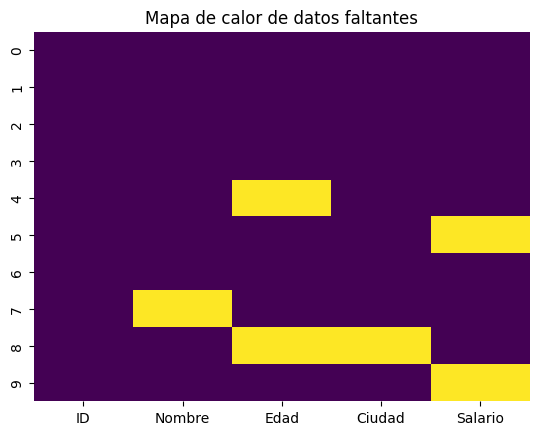

In [5]:
#Visualizar los datos
#Mapa de calor
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de datos faltantes')
plt.show()



In [6]:
#Identificar anomalias atipicos
print(df.describe())

             ID       Edad     Salario
count  10.00000   8.000000     8.00000
mean    5.50000  29.375000  3450.00000
std     3.02765  19.123191   320.71349
min     1.00000   2.000000  3000.00000
25%     3.25000  22.000000  3200.00000
50%     5.50000  27.000000  3450.00000
75%     7.75000  31.250000  3625.00000
max    10.00000  70.000000  4000.00000


Text(0.5, 1.0, 'Boxplot para edad y salario')

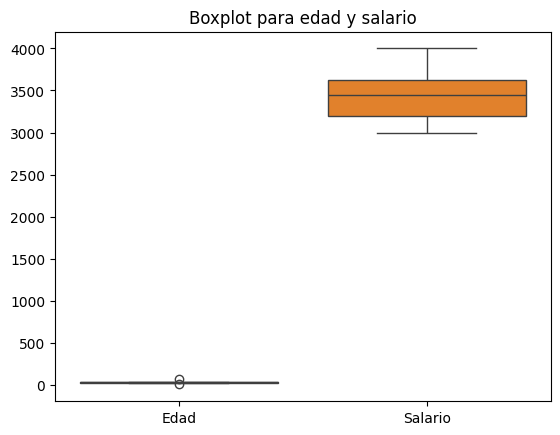

In [7]:
#Grafico de bigotes para identifcar valores atipicos
sns.boxplot(data = df[['Edad', 'Salario']])
plt.title('Boxplot para edad y salario')

Text(0.5, 1.0, 'Boxplot para edad y salario')

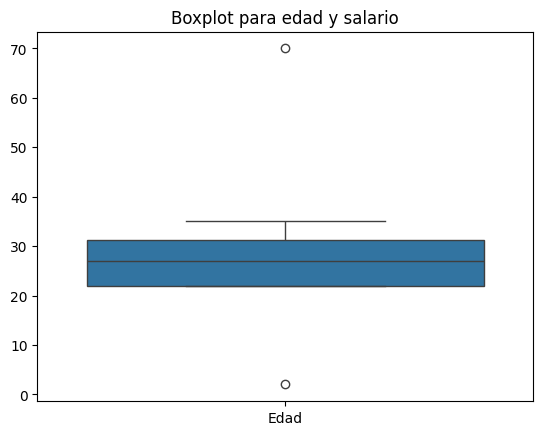

In [8]:
#Grafico de bigotes para identifcar valores atipicos
sns.boxplot(data = df[['Edad']])
plt.title('Boxplot para edad y salario')

In [9]:
#Definir mi rango quartiquelo
Q1 = df['Edad'].quantile(0.25)

Q3 = df['Edad'].quantile(0.75)

IQR = Q3 - Q1

print(IQR)


9.25


In [10]:
#Identificar mis datos entre el rango quartileco 
outlier = df[(df['Edad']< (Q1 - 1.5 * IQR)) | (df['Edad'] > (Q3 + 1.5 * IQR))]
print(outlier)


   ID Nombre  Edad    Ciudad  Salario
0   1   Juan  70.0    Madrid   3000.0
6   7  Pedro   2.0  Valencia   3700.0
